### Importación de datos



In [46]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tiendas = [tienda, tienda2, tienda3, tienda4]
tiendas_name = ["tienda", "tienda2", "tienda3", "tienda4"]
tienda2.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Silla de oficina,Muebles,283600.0,15300.0,04/08/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
1,Pandereta,Instrumentos musicales,76800.0,2300.0,26/11/2020,Blanca Ramirez,Medellín,3,Tarjeta de crédito,4,6.25184,-75.56359
2,Cama king,Muebles,443300.0,23800.0,22/10/2021,Izabela de León,Pereira,5,Tarjeta de crédito,10,4.81333,-75.69611
3,Cama king,Muebles,906200.0,46400.0,04/05/2022,Maria Alfonso,Cali,5,Tarjeta de crédito,10,3.43722,-76.52250
4,Silla de oficina,Muebles,397800.0,19400.0,26/02/2022,Lucas Olivera,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175


#1. Análisis de facturación



In [13]:
ingreso_tiendas = []
for ingreso in tiendas:
    ingreso_tiendas.append(ingreso["Precio"].sum())

print(ingreso_tiendas)


[np.float64(1150880400.0), np.float64(1116343500.0), np.float64(1098019600.0), np.float64(1038375700.0)]


# 2. Ventas por categoría

In [18]:
venta_tiendas = []
for venta in tiendas:
    venta_tiendas.append(venta["Categoría del Producto"].value_counts())
print(venta_tiendas)

[Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64, Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64, Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, dtype: int64, Categoría del Producto
Muebles                    480
Electrónicos               451
Juguetes            

# 3. Calificación promedio de la tienda


In [12]:
calificacion_tiendas = []
for calificacion in tiendas:
    calificacion_tiendas.append(calificacion["Calificación"].sum()/len(calificacion["Calificación"]))
print(calificacion_tiendas)

[np.float64(3.976685036032217), np.float64(4.037303942348453), np.float64(4.048325561678677), np.float64(3.9957591178965224)]


# 4. Productos más y menos vendidos

In [19]:
max_product = []
min_product = []
for product in venta_tiendas:
    max_product.append(product.idxmax())
    min_product.append(product.idxmin())
print(max_product, min_product)

['Muebles', 'Muebles', 'Muebles', 'Muebles'] ['Artículos para el hogar', 'Artículos para el hogar', 'Instrumentos musicales', 'Instrumentos musicales']


In [ ]:
import matplotlib.pyplot as plt

def plot_product_sales(product_counts, store_name):
    product_counts.plot(kind="bar", figsize=(10, 5))
    plt.title(f"Product sales in {store_name}")
    plt.xlabel("Product")
    plt.ylabel("Number of sales")
    plt.xticks(rotation=45)
    plt.show()

for product, tienda in zip(venta_tiendas, tiendas_name):
    plot_product_sales(product, f"{tienda}")

# 5. Envío promedio por tienda

In [55]:
shipping = {
    "Tienda 1": tienda["Costo de envío"].mean(),
    "Tienda 2": tienda2["Costo de envío"].mean(),
    "Tienda 3": tienda3["Costo de envío"].mean(),
    "Tienda 4": tienda4["Costo de envío"].mean()
}
print(shipping)

{'Tienda 1': np.float64(26018.60958033065), 'Tienda 2': np.float64(25216.235693090293), 'Tienda 3': np.float64(24805.680373039424), 'Tienda 4': np.float64(23459.457167090754)}


# 6. Informe

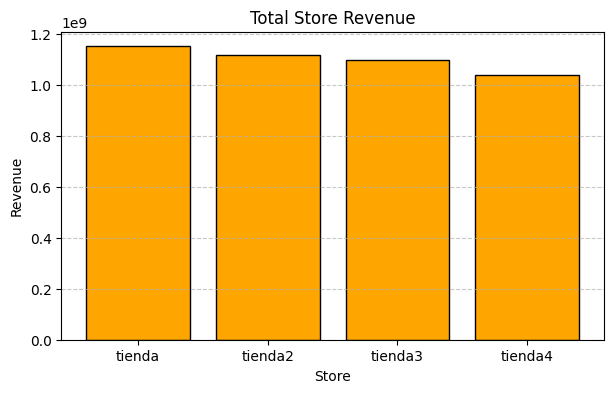

In [ ]:
plt.figure(figsize=(7,4))
plt.bar(tiendas_name, ingreso_tiendas, color="orange", edgecolor="black")
plt.title("Total Store Revenue")
plt.xlabel("Store")
plt.ylabel("Revenue")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout
plt.show()

Se observa en el gráfico superior que la tienda 1 tiene mayores ingresos que las otras 3 tiendas, considerando a la tienda 4 como la tienda que menos ventas tiene de las 4 mencionadas.

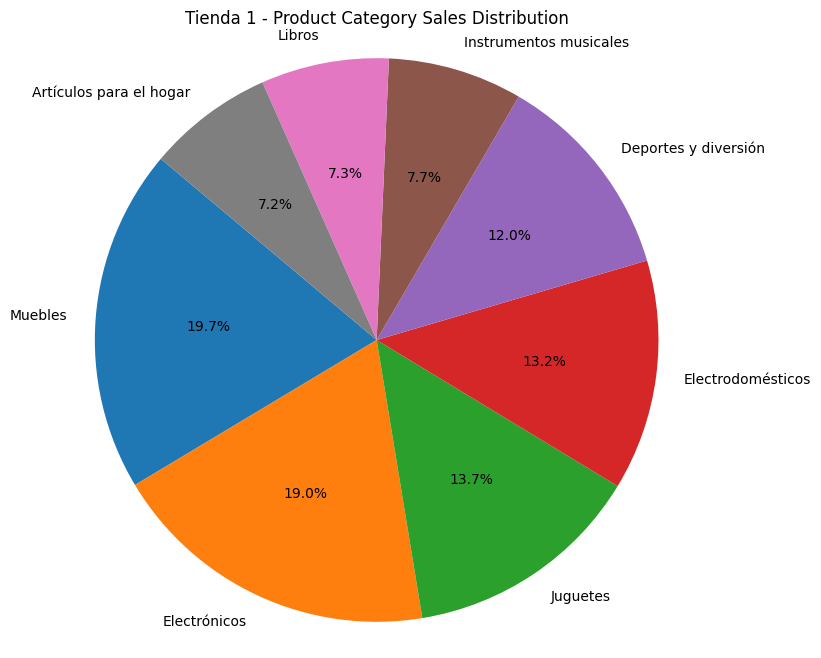

In [58]:
# Count products per category
category_counts = tienda["Categoría del Producto"].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct="%1.1f%%", startangle=140)
plt.title("Tienda 1 - Product Category Sales Distribution")
plt.axis("equal")  # Ensures the pie is a circle
plt.show()

Observamos en el grafico de torta que el producto que más es vendido son los muebles, y el que menos vendido son los artículos para el hogar de forma general.

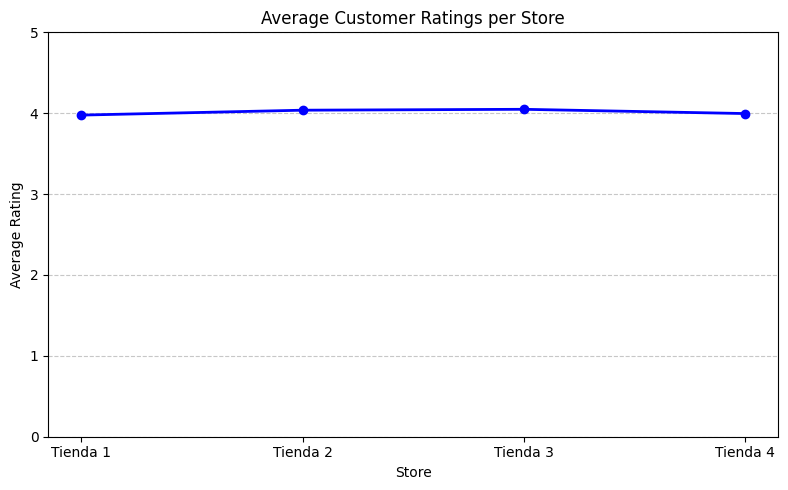

In [61]:
# Calculate average ratings
average_ratings = {
    "Tienda 1": tienda["Calificación"].mean(),
    "Tienda 2": tienda2["Calificación"].mean(),
    "Tienda 3": tienda3["Calificación"].mean(),
    "Tienda 4": tienda4["Calificación"].mean()
}

# Prepare data
stores = list(average_ratings.keys())
ratings = list(average_ratings.values())

# Plot line graph
plt.figure(figsize=(8, 5))
plt.plot(stores, ratings, marker='o', color='blue', linestyle='-', linewidth=2)
plt.title("Average Customer Ratings per Store")
plt.xlabel("Store")
plt.ylabel("Average Rating")
plt.ylim(0, 5)  # Assuming ratings are out of 5
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Se observa que aparentemente las 4 tiendas poseen el mismo nivel de calificación, siento la tienda 2 y 3 quienes poseen una calificación mayor (aunque notablemente mínima).

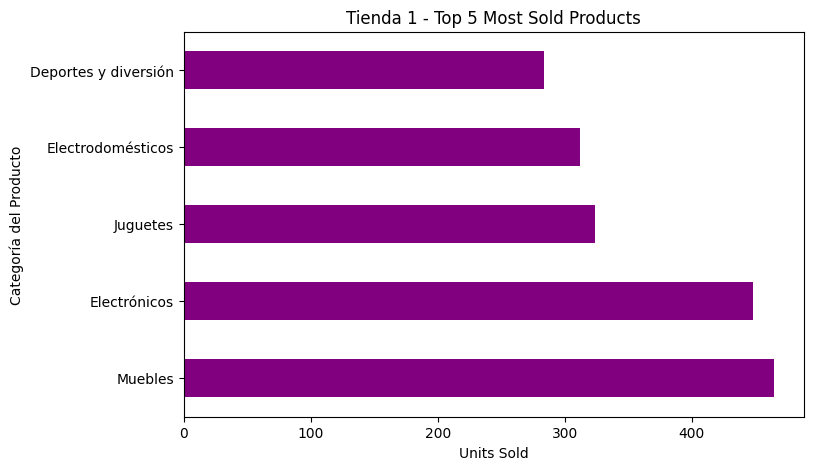

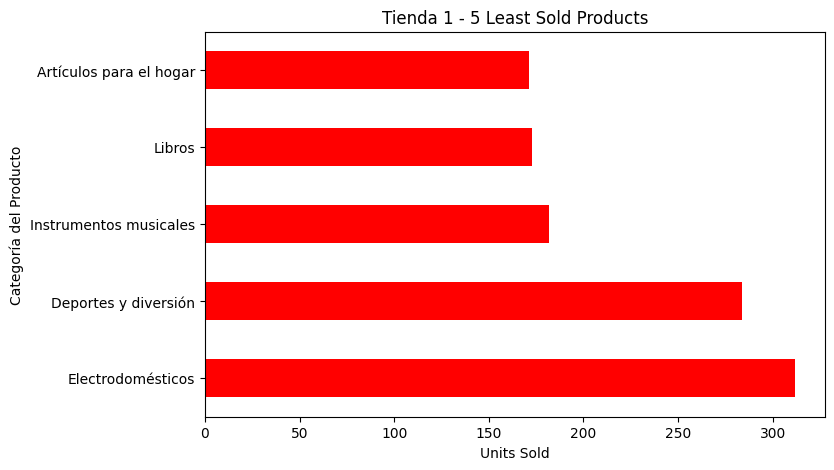

In [47]:
product_counts = tienda["Categoría del Producto"].value_counts()

plt.figure(figsize=(8,5))
product_counts.head(5).plot(kind="barh", color="purple")
plt.title("Tienda 1 - Top 5 Most Sold Products")
plt.xlabel("Units Sold")
plt.show()

plt.figure(figsize=(8,5))
product_counts.tail(5).plot(kind="barh", color="red")
plt.title("Tienda 1 - 5 Least Sold Products")
plt.xlabel("Units Sold")
plt.show()

El gráfico de barras horizontal nos muestra que efectivamente, el producto más vendido es el mueble, y el menos vendido los artículos para el hogar.

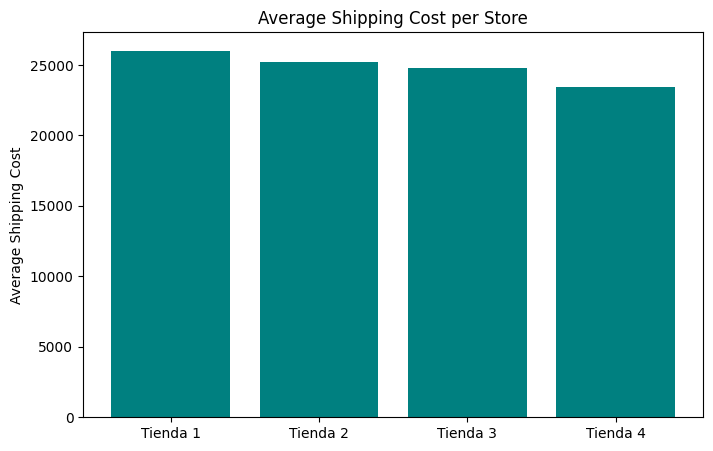

In [53]:
shipping = {
    "Tienda 1": tienda["Costo de envío"].mean(),
    "Tienda 2": tienda2["Costo de envío"].mean(),
    "Tienda 3": tienda3["Costo de envío"].mean(),
    "Tienda 4": tienda4["Costo de envío"].mean()
}

plt.figure(figsize=(8,5))
plt.bar(shipping.keys(), shipping.values(), color="teal")
plt.title("Average Shipping Cost per Store")
plt.ylabel("Average Shipping Cost")
plt.show()


En cuanto al costo promedio de envios, la tienda 1 posee mayores niveles de costos a comparación de las otras 3 tiendas, y es la tienda 4 aquella que tiene menores niveles de costos de envío